In [3]:
# Chapter 7, problem 3, Normal distribution
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as scp

In [4]:
df = pd.read_csv("fijiquakes.dat", delimiter="\s+")
df

,Obs.,lat,long,depth,mag,stations
0,1,-20.42,181.62,562,4.8,41
1,2,-20.62,181.03,650,4.2,15
2,3,-26.00,184.10,42,5.4,43
3,4,-17.97,181.66,626,4.1,19
4,5,-20.42,181.96,649,4.0,11
...,...,...,...,...,...,...
995,996,-25.93,179.54,470,4.4,22
996,997,-12.28,167.06,248,4.7,35
997,998,-20.13,184.20,244,4.5,34
998,999,-17.40,187.80,40,4.5,14


In [5]:
data = df.mag
data

0      4.8
1      4.2
2      5.4
3      4.1
4      4.0
      ... 
995    4.4
996    4.7
997    4.5
998    4.5
999    6.0
Name: mag, Length: 1000, dtype: float64

In [6]:
data_sort = np.sort(data)
n = len(data_sort)

In [7]:
def ecdf(data, x_vec, alpha):
    n = len(data)
    eps = (np.log(2/alpha)/2/n) ** 0.5
    F_lo, F_hat, F_hi = [], [], []
    for x in x_vec:
        if x >= data_sort[-1]:idx = n
        elif x < data_sort[0]: idx = 0
        else: idx = np.argwhere(data_sort>x)[0][0]
        F_hat.append(idx/n)
        F_lo.append(max(idx/n-eps, 0))
        F_hi.append(min(idx/n+eps, 1))
    return F_lo, F_hat, F_hi

In [8]:
x_vec = np.linspace(3.5, 7, 100)
F_lo, F_hat, F_hi = ecdf(data, x_vec, 0.05)

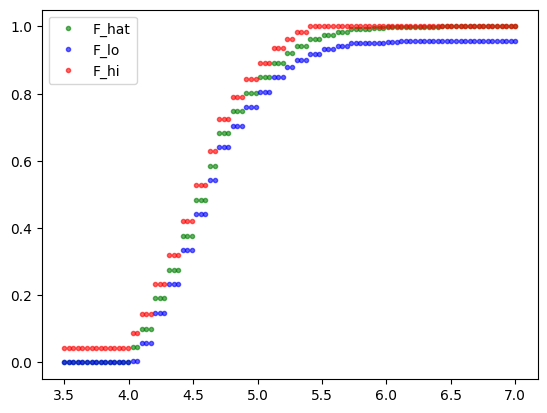

In [9]:
plt.plot(x_vec, F_hat, "g.", lw=5, alpha=0.6, label="F_hat")
plt.plot(x_vec, F_lo, "b.", lw=1, alpha=0.6, label="F_lo")
plt.plot(x_vec, F_hi, "r.", lw=1, alpha=0.6, label="F_hi")
plt.legend(loc="best")
plt.show()

In [14]:
def eval_cdf(x):
    idx = 0
    if x >= data_sort[-1]: idx = n
    elif x < data_sort[0]: idx = 0
    else: idx = np.argwhere(data_sort>x)[0][0]
    F = idx/n
    se = (F*(1-F)/n) ** 0.5
    return F, se

In [15]:
b, a = 4.9, 4.3
F_a, se_a = eval_cdf(a)
F_b, se_b = eval_cdf(b)
theta_hat = F_b - F_a
se_hat = (se_a**2 + se_b**2) ** 0.5



In [16]:
z = scp.norm.ppf(0.975)
print(f"95% confidence interval: ({theta_hat-z*se_hat}, {theta_hat+z*se_hat})")

95% confidence interval: (0.4888836429282543, 0.5631163570717457)


In [38]:
data = pd.read_csv("faithful.dat", delimiter="\s+")
data

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
...,...,...
268,4.117,81
269,2.150,46
270,4.417,90
271,1.817,46


In [39]:
data = data.waiting
data

1      79
2      54
3      74
4      62
5      85
       ..
268    81
269    46
270    90
271    46
272    74
Name: waiting, Length: 272, dtype: int64

In [40]:
data = np.array(data)
data

array([79, 54, 74, 62, 85, 55, 88, 85, 51, 85, 54, 84, 78, 47, 83, 52, 62,
       84, 52, 79, 51, 47, 78, 69, 74, 83, 55, 76, 78, 79, 73, 77, 66, 80,
       74, 52, 48, 80, 59, 90, 80, 58, 84, 58, 73, 83, 64, 53, 82, 59, 75,
       90, 54, 80, 54, 83, 71, 64, 77, 81, 59, 84, 48, 82, 60, 92, 78, 78,
       65, 73, 82, 56, 79, 71, 62, 76, 60, 78, 76, 83, 75, 82, 70, 65, 73,
       88, 76, 80, 48, 86, 60, 90, 50, 78, 63, 72, 84, 75, 51, 82, 62, 88,
       49, 83, 81, 47, 84, 52, 86, 81, 75, 59, 89, 79, 59, 81, 50, 85, 59,
       87, 53, 69, 77, 56, 88, 81, 45, 82, 55, 90, 45, 83, 56, 89, 46, 82,
       51, 86, 53, 79, 81, 60, 82, 77, 76, 59, 80, 49, 96, 53, 77, 77, 65,
       81, 71, 70, 81, 93, 53, 89, 45, 86, 58, 78, 66, 76, 63, 88, 52, 93,
       49, 57, 77, 68, 81, 81, 73, 50, 85, 74, 55, 77, 83, 83, 51, 78, 84,
       46, 83, 55, 81, 57, 76, 84, 77, 81, 87, 77, 51, 78, 60, 82, 91, 53,
       78, 46, 77, 84, 49, 83, 71, 80, 49, 75, 64, 76, 53, 94, 55, 76, 50,
       82, 54, 75, 78, 79

In [22]:
mu = np.mean(data)


In [24]:
def eval_std_dev(data, mu):
    res = 0
    for i in range(len(data)):
        res += (data[i]-mu)* (data[i]-mu)
    return (res/len(data))**0.5

In [25]:
sigma = eval_std_dev(data, mu)

In [28]:
z_90 = scp.norm.ppf(.95)
print(f"90% confidence interval: ({mu-z_90*sigma}, {mu+z_90*sigma})")

90% confidence interval: (48.57646087101601, 93.2176567760428)


In [33]:
def eval_median(data):
    data = np.sort(data)
    n = len(data)
    if n % 2:return data[n//2];
    else:return (data[(n-1)//2]+data[n//2])/2
        

In [34]:
med = eval_median(data)
print(f"median: {med}")

median: 76.0


In [42]:
def bootstrap(data, stats, n_trials):
    T_hat = stats(data)
    n = len(data)
    stats_boot = []
    for trial in range(n_trials):
        sample = []
        for i in range(n):
            idx = np.random.randint(0, n)
            sample.append(data[idx])
        stats_boot.append(stats(sample))
    se = eval_std_dev(stats_boot, T_hat)
    return T_hat, se

In [50]:
T_hat, se = bootstrap(data, eval_median, 100)
print(f"median: {T_hat} with standard error of {se}")

median: 76.0 with standard error of 1.2278029157808674


In [51]:
data = pd.read_csv("cloud.txt", delimiter="\s+")

In [55]:
seeded = np.array(data.Seeded_Clouds)
unseeded = np.array(data.Unseeded_Clouds)


In [54]:
n = len(seeded)

In [60]:
def est_mean(data):
    n = len(data)
    mu = np.mean(data)
    sigma = eval_std_dev(data, mu)
    se = sigma/n**0.5
    return mu, se
    

In [61]:
mu1, se1 = est_mean(seeded)
mu2, se2 = est_mean(unseeded)
theta = mu1 - mu2
se = (se1**2 + se2**2) ** 0.5
z_95 = scp.norm.ppf(0.975)
print(f"difference in precipitation: {theta}")
print(f"95% confidence interval: ({theta-se*z_95}, {theta+se*z_95})")


difference in precipitation: 277.3961538461539
95% confidence interval: (10.597765101291259, 544.1945425910164)


In [59]:
se

26.696137926236442